In [4]:
import os
import numpy as np
from tqdm import tqdm
from pydub import AudioSegment
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from pydub.silence import split_on_silence

# Qualitative Audio Data Analysis

In [5]:
DATA = 'data/web_app/'
OUT = 'data/processed/chunks/'
FAULTY = []

In [6]:
# saves the chunks of only important audio for later use
def save_chunks(chunks, out_dir):
    for i, c in enumerate(chunks):
        c.export(out_dir+str(i)+".wav", format="wav")
        
def get_chunks(data_dir):
    n_chunks = []
    a_durations = []
    durations = []
    samples = os.listdir(data_dir)
    
    for s in tqdm(samples):
        try:
            if os.path.splitext(s)[-1] != ".wav":
                continue
            signal = AudioSegment.from_wav(data_dir+s)
            durations.append(signal.duration_seconds)
            chunks = split_on_silence(signal, 
                min_silence_len=500,
                silence_thresh=-35
            )
            #save_chunks(chunks, OUT+s.replace(".wav", ""))
            n_chunks.append(len(chunks))
            tot = 0
            for c in chunks:
                tot += c.duration_seconds
            a_durations.append(tot)
            
        except Exception as e:
            #print(str(e)+"-"+data_dir+s)
            FAULTY.append(data_dir+s)
            n_chunks.append(0)
            a_durations.append(0)
        
    return n_chunks, a_durations, durations



In [7]:
def generate_data(data_dir):
    display(Markdown("**Analysing**: *"+data_dir+"*"))
    
    n_chunks, useful_durations, total_durations = get_chunks(DATA+data_dir)

    avg_duration = round(np.mean(total_durations), 3)
    avg_useful_duration = round(np.mean(useful_durations), 3)
    n_samples = len(useful_durations)
    
    display(Markdown("**Average sample length**: "+str(avg_duration)+"*s*"))
    display(Markdown("**Average length of usable audio per sample**: "+str(avg_useful_duration)+"*s*"))
    
    range_durations = {
        "0s":0,
        "0.5s":0,
        "1s":0,
        "1.5s":0,
        "2s":0,
        "2s+":0
    }

    for d in useful_durations:
        if d <= 0:
            range_durations["0s"] += 1
        elif d > 0 and d <= 0.5:
            range_durations["0.5s"] += 1
        elif d > 0.5 and d <= 1:
            range_durations["1s"] += 1
        elif d > 1 and d <= 1.5:
            range_durations["1.5s"] += 1
        elif d > 1.5 and d <= 2:
            range_durations["2s"] += 1
        else:
            range_durations["2s+"] += 1
    
    for key, value in range_durations.items():
        range_durations[key] = int(round((value/n_samples)*100))
    
    display(Markdown("### Distribution of usable audio in samples:"))
    fig1, ax1 = plt.subplots()
    ax1.pie(range_durations.values(), labels=range_durations.keys(), autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')
    plt.show()
    
    display(Markdown("**"+str(range_durations["0s"])+"%** of the samples are unusable"))



**Analysing**: *2020-04-03/*

100%|██████████| 129/129 [08:28<00:00,  3.95s/it]


**Average sample length**: 52.341*s*

**Average length of usable audio per sample**: 9.831*s*

### Distribution of usable audio in samples:

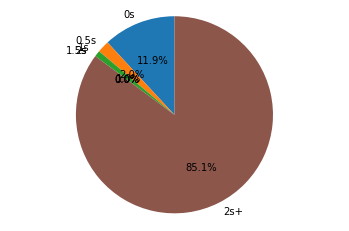

**12%** of the samples are unusable

In [9]:
generate_data("2020-04-03/")

**Analysing**: *2020-04-07/*

100%|██████████| 530/530 [03:13<00:00,  2.73it/s]


**Average sample length**: 7.119*s*

**Average length of usable audio per sample**: 1.791*s*

### Distribution of usable audio in samples:

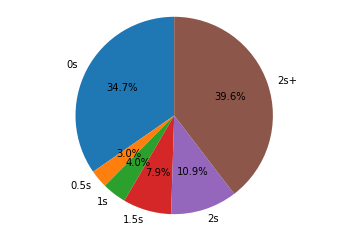

**35%** of the samples are unusable

In [10]:
generate_data("2020-04-07/")

**Analysing**: *2020-04-10/*

100%|██████████| 519/519 [03:19<00:00,  2.60it/s]


**Average sample length**: 7.317*s*

**Average length of usable audio per sample**: 1.766*s*

### Distribution of usable audio in samples:

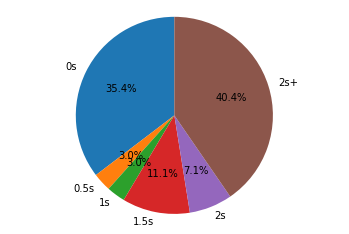

**35%** of the samples are unusable

In [11]:
generate_data("2020-04-10/")

**Analysing**: *2020-04-14/*

100%|██████████| 446/446 [04:57<00:00,  1.50it/s]


**Average sample length**: 10.256*s*

**Average length of usable audio per sample**: 2.905*s*

### Distribution of usable audio in samples:

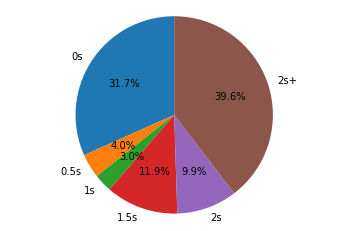

**32%** of the samples are unusable

In [12]:
generate_data("2020-04-14/")

In [ ]:
generate_data("2020-04-26/")

**Analysing**: *2020-04-26/*

 95%|█████████▍| 642/677 [07:58<00:26,  1.35it/s]